In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\91999\Downloads\mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape

(1453, 15)

In [6]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [16]:
df.isnull().sum()

# checking if there is any missing value

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

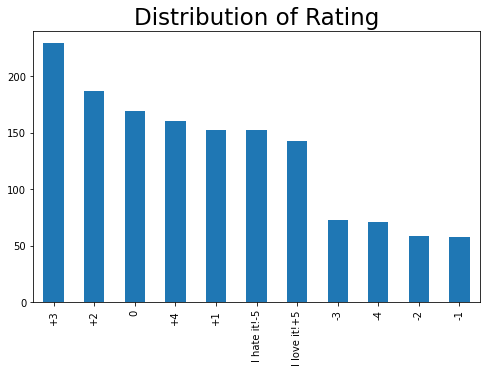

In [19]:
df.Like.value_counts().plot(kind = 'bar', figsize = (8,5))
plt.title('Distribution of Rating', fontdict={'fontsize':23})

plt.show()

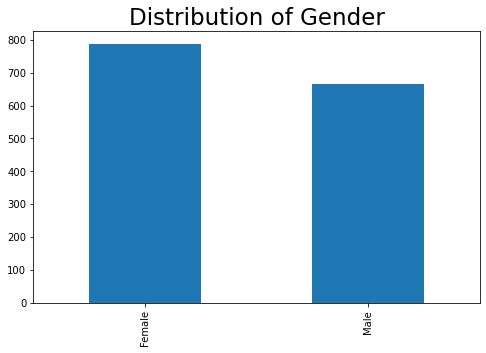

In [40]:
df.Gender.value_counts().plot(kind = 'bar', figsize = (8,5))
plt.title('Distribution of Gender', fontdict={'fontsize':23})

plt.show()

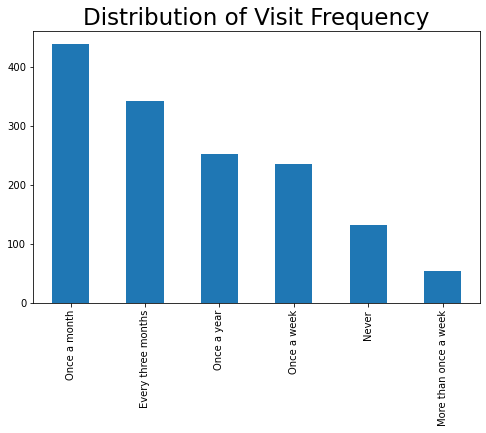

In [56]:
df.VisitFrequency.value_counts().plot(kind = 'bar', figsize = (8,5))
plt.title('Distribution of Visit Frequency', fontdict={'fontsize':23})

plt.show()

In [57]:
df.VisitFrequency.value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

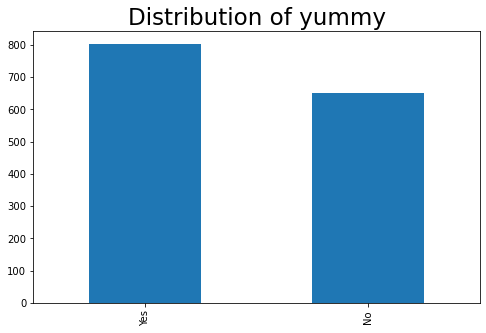

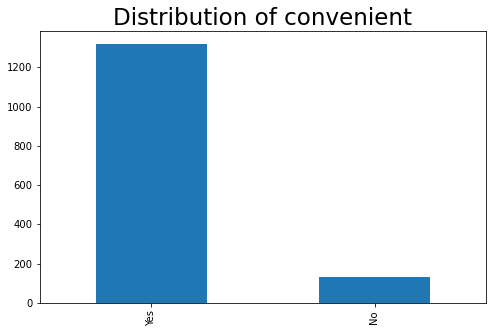

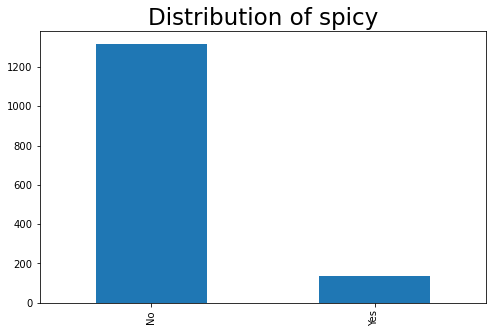

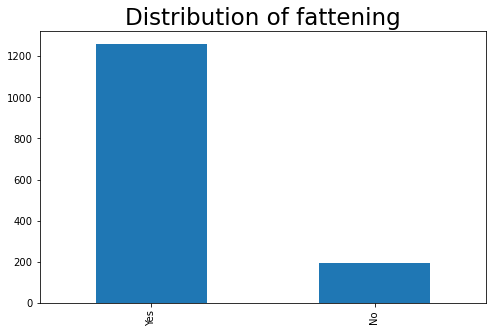

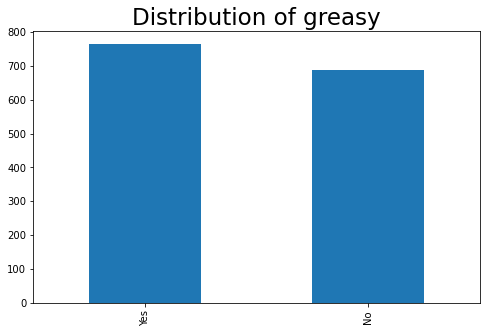

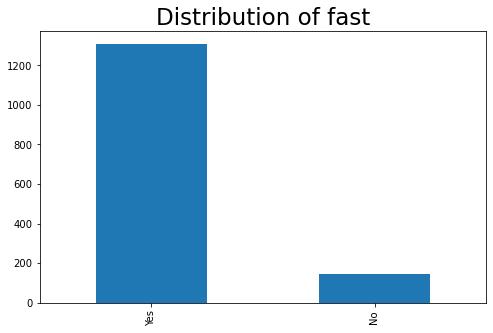

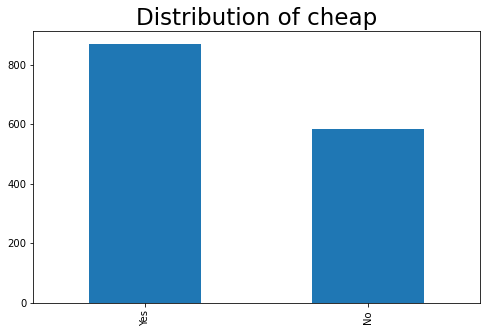

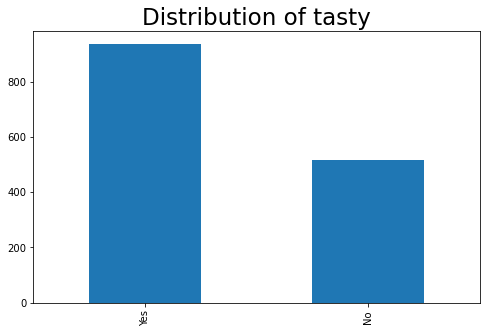

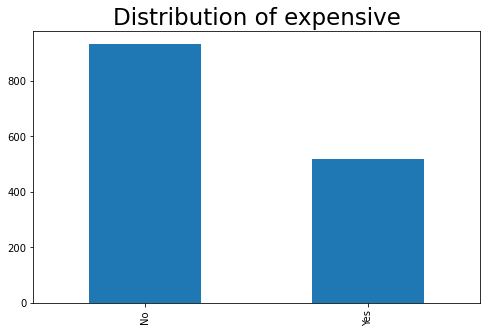

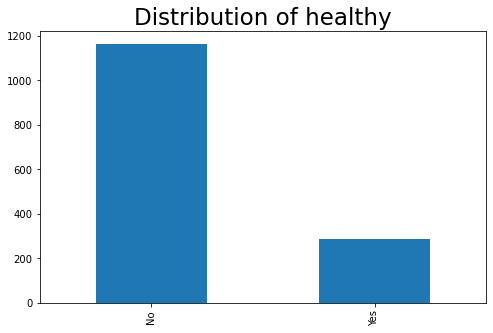

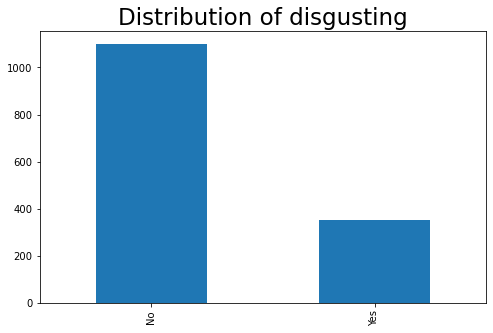

In [44]:
segmentation_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                     'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for col in segmentation_cols:
    df[col].value_counts().plot(kind = 'bar', figsize = (8,5))
    plt.title(f'Distribution of {col}', fontdict={'fontsize':23})

    plt.show()

In [20]:
df.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [30]:
df_copy = df.copy()

In [31]:
# Selecting the columns with segmentation variables
segmentation_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                     'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Converting YES/NO to numeric binary (1/0)
for col in segmentation_cols:
    df_copy[col] = df_copy[col].map({'Yes': 1, 'No': 0})

# Calculating average values for each transformed segmentation variable
avg_values = df_copy[segmentation_cols].mean().round(2)

print(avg_values)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [32]:
df_copy.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

We have to change 'I love it!+5', 'I hate it!-5' into +5 and -5 respectively.

In [35]:
# Replace values in the 'Like' column

df_copy['Like'] = df_copy['Like'].replace({'I love it!+5': '+5', 'I hate it!-5': '-5'})


In [54]:
df_copy.Like.unique()

array([-3,  2,  1,  4,  5, -5, -2,  3,  0, -4, -1], dtype=int64)

In [58]:
# converting values in 'Like' column to numeric

In [37]:
df_copy.Like =  pd.to_numeric(df_copy.Like, errors='coerce')

In [38]:
df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


In [39]:
df_copy.Like.unique()

array([-3,  2,  1,  4,  5, -5, -2,  3,  0, -4, -1], dtype=int64)

## Insights

1. More than 50% of customers find the food yummy, flattening, greasy, cheap and tasty.

2. More than 90% find the foof fast and convenient.

3. 80% of the customers find it unhealthy.
4. Majority of the people gave a +3 rating.
5. 30% visit once a month and 23% visit once every 3 months.
6. No of female customers are greater than males.